<a href="https://colab.research.google.com/github/tomfaulkenberry/courses/blob/master/summer2019/mathpsychREU/lecture9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Lecture 9 - parameter recovery


import numpy as np
import matplotlib.pyplot as plt

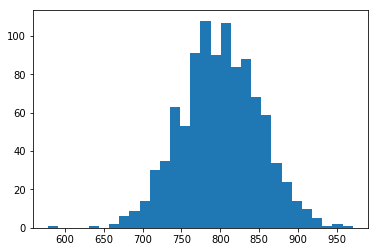

799.8054294857203


In [0]:
# prior for mean

from scipy.stats import norm

means = norm.rvs(size=1000, loc=800, scale=50)

plt.hist(means, bins=30)
plt.show()
print(means.mean())

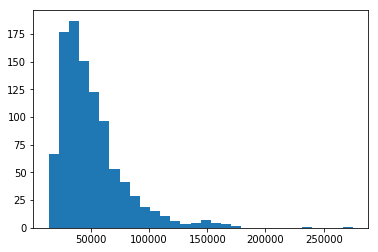

50568.751852751404


In [0]:
# prior for variance
from scipy.stats import invgamma

var = invgamma.rvs(size=1000, a=5, scale=200000)

plt.hist(var, bins=30)
plt.show()

print(var.mean())


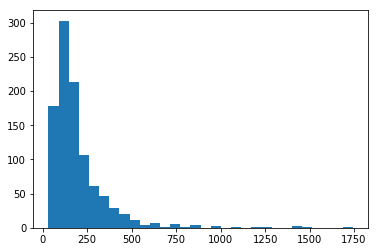

195.67618829379225


In [0]:
# prior for tau

tau = invgamma.rvs(size=1000, a=3, scale=400)

plt.hist(tau, bins=30)
plt.show()

print(tau.mean())

In [0]:
# generate an "experiment"

p = 50 # subjects
n = 100 # trials per subject

# empty array to store RTs
RT = np.zeros((p, n))

# empty array to store parameters
pars = np.zeros((p,3))

# generate rows of exGaussian params for each subject
for i in range(p):
  pars[i,0] = norm.rvs(size=1, loc=800, scale=50) # values of mu
  pars[i,1] = np.sqrt(invgamma.rvs(size=1, a=5, scale=200000))  # values for sigma
  pars[i,2] = invgamma.rvs(size=1, a=3, scale=400) # values for tau
  
# generate RTs from ex-Gaussian distributions defined by rows of "pars"
from scipy.stats import exponnorm

for i in range(p):
  mu = pars[i,0]
  sigma = pars[i,1]
  tau = pars[i,2]
  RT[i,:] = exponnorm.rvs(size=n, loc=mu, scale=sigma, K=tau/sigma)
  

In [0]:
RT.shape

(50, 100)

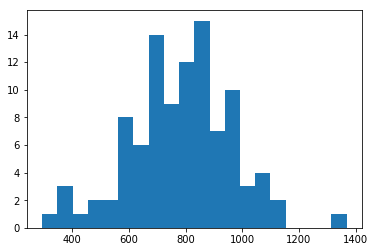

In [0]:
# plot some RT distributions to see the generated data

subject=2 # change subject number to see different plot
plt.hist(RT[subject,:], bins=20)
plt.show()


In [0]:
# next steps:
# 
# 1. define "fitEG" function (we did this in earlier code)
# 2. apply fitEG function to each row of the RT array - should output fitted values of mu, sigma, and tau
# 3. store each fitted tuple (mu, sigma, tau) into an array called "fits"